In [1]:
# Loading the dataset
# Import pandas library
import pandas as pd
# Import numpy
import numpy as np
# Reading the dataset
mydata = pd.read_csv("MPD-area-radiusandulna-aim.csv")

In [2]:
mydata.head()

,URN,R_area,U_area,AIM
0,ML018_PD_001,0.000,0.0,243
1,ML018_PD_002,71.625,0.0,243
2,ML018_PD_003,24.750,0.0,243
3,ML018_PD_004,38.750,0.0,243
4,ML018_PD_005,27.875,0.0,243


In [3]:
mydata.describe()

,R_area,U_area,AIM
count,951.000000,951.000000,951.000000
mean,69.010778,25.074132,252.256572
std,131.818413,62.851888,48.132901
min,0.000000,0.000000,123.000000
25%,0.000000,0.000000,217.000000
50%,0.000000,0.000000,259.000000
75%,60.812500,0.000000,295.000000
max,627.500000,479.625000,323.000000


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URN     951 non-null    object 
 1   R_area  951 non-null    float64
 2   U_area  951 non-null    float64
 3   AIM     951 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 29.8+ KB


In [5]:
X = mydata.drop(['URN', 'AIM'], axis = 1)
print(X)

     R_area  U_area
0     0.000     0.0
1    71.625     0.0
2    24.750     0.0
3    38.750     0.0
4    27.875     0.0
..      ...     ...
946  35.750     0.0
947   6.250     0.0
948   0.000     0.0
949   0.000     0.0
950  32.875     0.0

[951 rows x 2 columns]


In [6]:
y = mydata['AIM']
print(y)

0      243
1      243
2      243
3      243
4      243
      ... 
946    298
947    298
948    298
949    298
950    298
Name: AIM, Length: 951, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(665, 2) (286, 2) (665,) (286,)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 358 to 684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  665 non-null    float64
 1   U_area  665 non-null    float64
dtypes: float64(2)
memory usage: 15.6 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 665 entries, 358 to 684
Series name: AIM
Non-Null Count  Dtype
--------------  -----
665 non-null    int64
dtypes: int64(1)
memory usage: 10.4 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 873 to 477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  286 non-null    float64
 1   U_area  286 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 286 entries, 873 to 477
Series name: AIM
Non-Null Count  Dtype
--------------  -----
286 non-null    int64
dtypes: int64(1)
memory usage: 4.5 KB


In [12]:
pd.set_option('display.max_rows', 500)
print(y_test)

873    299
568    173
249    264
331    323
492    183
692    217
821    314
724    320
14     231
31     314
758    123
691    293
634    211
499    257
231    256
215    305
642    208
202    251
794    249
298    265
875    308
342    190
803    273
372    298
77     275
567    173
440    269
317    319
386    312
566    173
615    154
940    298
524    312
894    323
101    277
501    257
402    194
200    259
345    190
672    298
380    226
732    312
278    295
439    269
367    298
204    251
350    190
337    323
196    259
735    312
891    323
750    207
597    224
382    226
310    319
947    298
926    285
295    265
363    298
97     183
299    265
933    200
55     261
746    207
285    250
743    207
538    270
640    208
247    289
678    217
65     305
868    299
252    264
862    299
141    142
688    293
264    206
827    314
513    288
409    202
453    291
742    207
60     305
142    142
145    142
676    217
877    308
236    286
366    298
603    224
671    298

In [13]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiation of the model

model = RandomForestRegressor()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

In [14]:
# Fitting the model

Age_rf = model.fit(X_train, y_train)

In [15]:
# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = Age_rf.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

The training r_sq is: 0.73
The MAE is: 18.89
The MAPE is: 0.08
The MSE is: 595.79
The RMSE is: 24.41
The EVS is: 0.73


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Age_rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rf_rmse_scores = np.sqrt(-scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [27.14907531 31.19442745 31.94802893 27.93946305 27.13052576 36.50206213
 27.43075491 30.00650369 27.0825465  31.35228993]
Mean: 29.773567765935297
Standard deviation: 2.907478669532408


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 4, 8, 16, 36, 64]}
]

Age_rf = RandomForestRegressor()

grid_search = GridSearchCV(Age_rf, param_grid, cv= 10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 64}

In [19]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=2, max_features=2,
                      n_estimators=64)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres ["params"]):
    print(np.sqrt(-mean_score), params)

29.79259881444727 {'max_features': 2, 'n_estimators': 64}
29.880003714311904 {'max_features': 2, 'n_estimators': 128}
29.808889652266746 {'max_features': 2, 'n_estimators': 256}
29.90131294397873 {'max_features': 4, 'n_estimators': 64}
29.862087302515377 {'max_features': 4, 'n_estimators': 128}
29.794454099658648 {'max_features': 4, 'n_estimators': 256}
29.955062226299223 {'max_features': 6, 'n_estimators': 64}
29.93591862123717 {'max_features': 6, 'n_estimators': 128}
29.85136734188801 {'max_features': 6, 'n_estimators': 256}
29.9480898261402 {'max_features': 8, 'n_estimators': 64}
29.84047534601942 {'max_features': 8, 'n_estimators': 128}
29.847674926118376 {'max_features': 8, 'n_estimators': 256}
29.641251318885477 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 64}
29.64125131888549 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 128}
29.641251318885534 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 256}
29.64

In [21]:
print('The training r_sq is: %.2f' % grid_search.best_estimator_.score(X_train, y_train))

The training r_sq is: 0.63


In [22]:
final_model = Age_rf

# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = grid_search.best_estimator_.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

In [23]:
# Prediction on the testing data
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)

In [24]:
print(final_prediction)

[275.49578024 194.83       275.49578024 275.49578024 199.78
 161.82       275.49578024 275.49578024 239.82       275.49578024
 175.2        275.49578024 209.06       270.28       251.75
 275.49578024 174.68       275.49578024 275.49578024 275.49578024
 275.49578024 158.16       275.49578024 275.49578024 275.49578024
 190.17       275.49578024 275.49578024 275.49578024 202.88
 173.89       275.49578024 275.49578024 275.49578024 275.49578024
 275.49578024 251.75       275.49578024 191.42       275.49578024
 193.35       275.49578024 275.49578024 275.49578024 275.49578024
 275.49578024 187.02       275.49578024 275.49578024 220.55
 275.49578024 227.92       159.22       200.71       275.49578024
 259.53280723 275.49578024 275.49578024 275.49578024 179.54
 275.49578024 186.43       275.49578024 154.39       275.49578024
 144.4        275.49578024 199.03       275.49578024 275.49578024
 275.49578024 275.49578024 264.93       275.49578024 196.86
 275.49578024 202.44       275.49578024 275.49

In [25]:
# The testing coef. of determination
print('The testing r_sq is: %.2f' % final_model.score(X_test, y_test))

# The metrics 
# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_test, final_prediction))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_test,final_prediction))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_test, final_prediction))

# The RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, final_prediction)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_test, final_prediction))

The testing r_sq is: 0.58
The MAE is: 26.56
The MAPE is: 0.11
The MSE is: 1076.64
The RMSE is: 32.812166231041964
The EVS is: 0.60


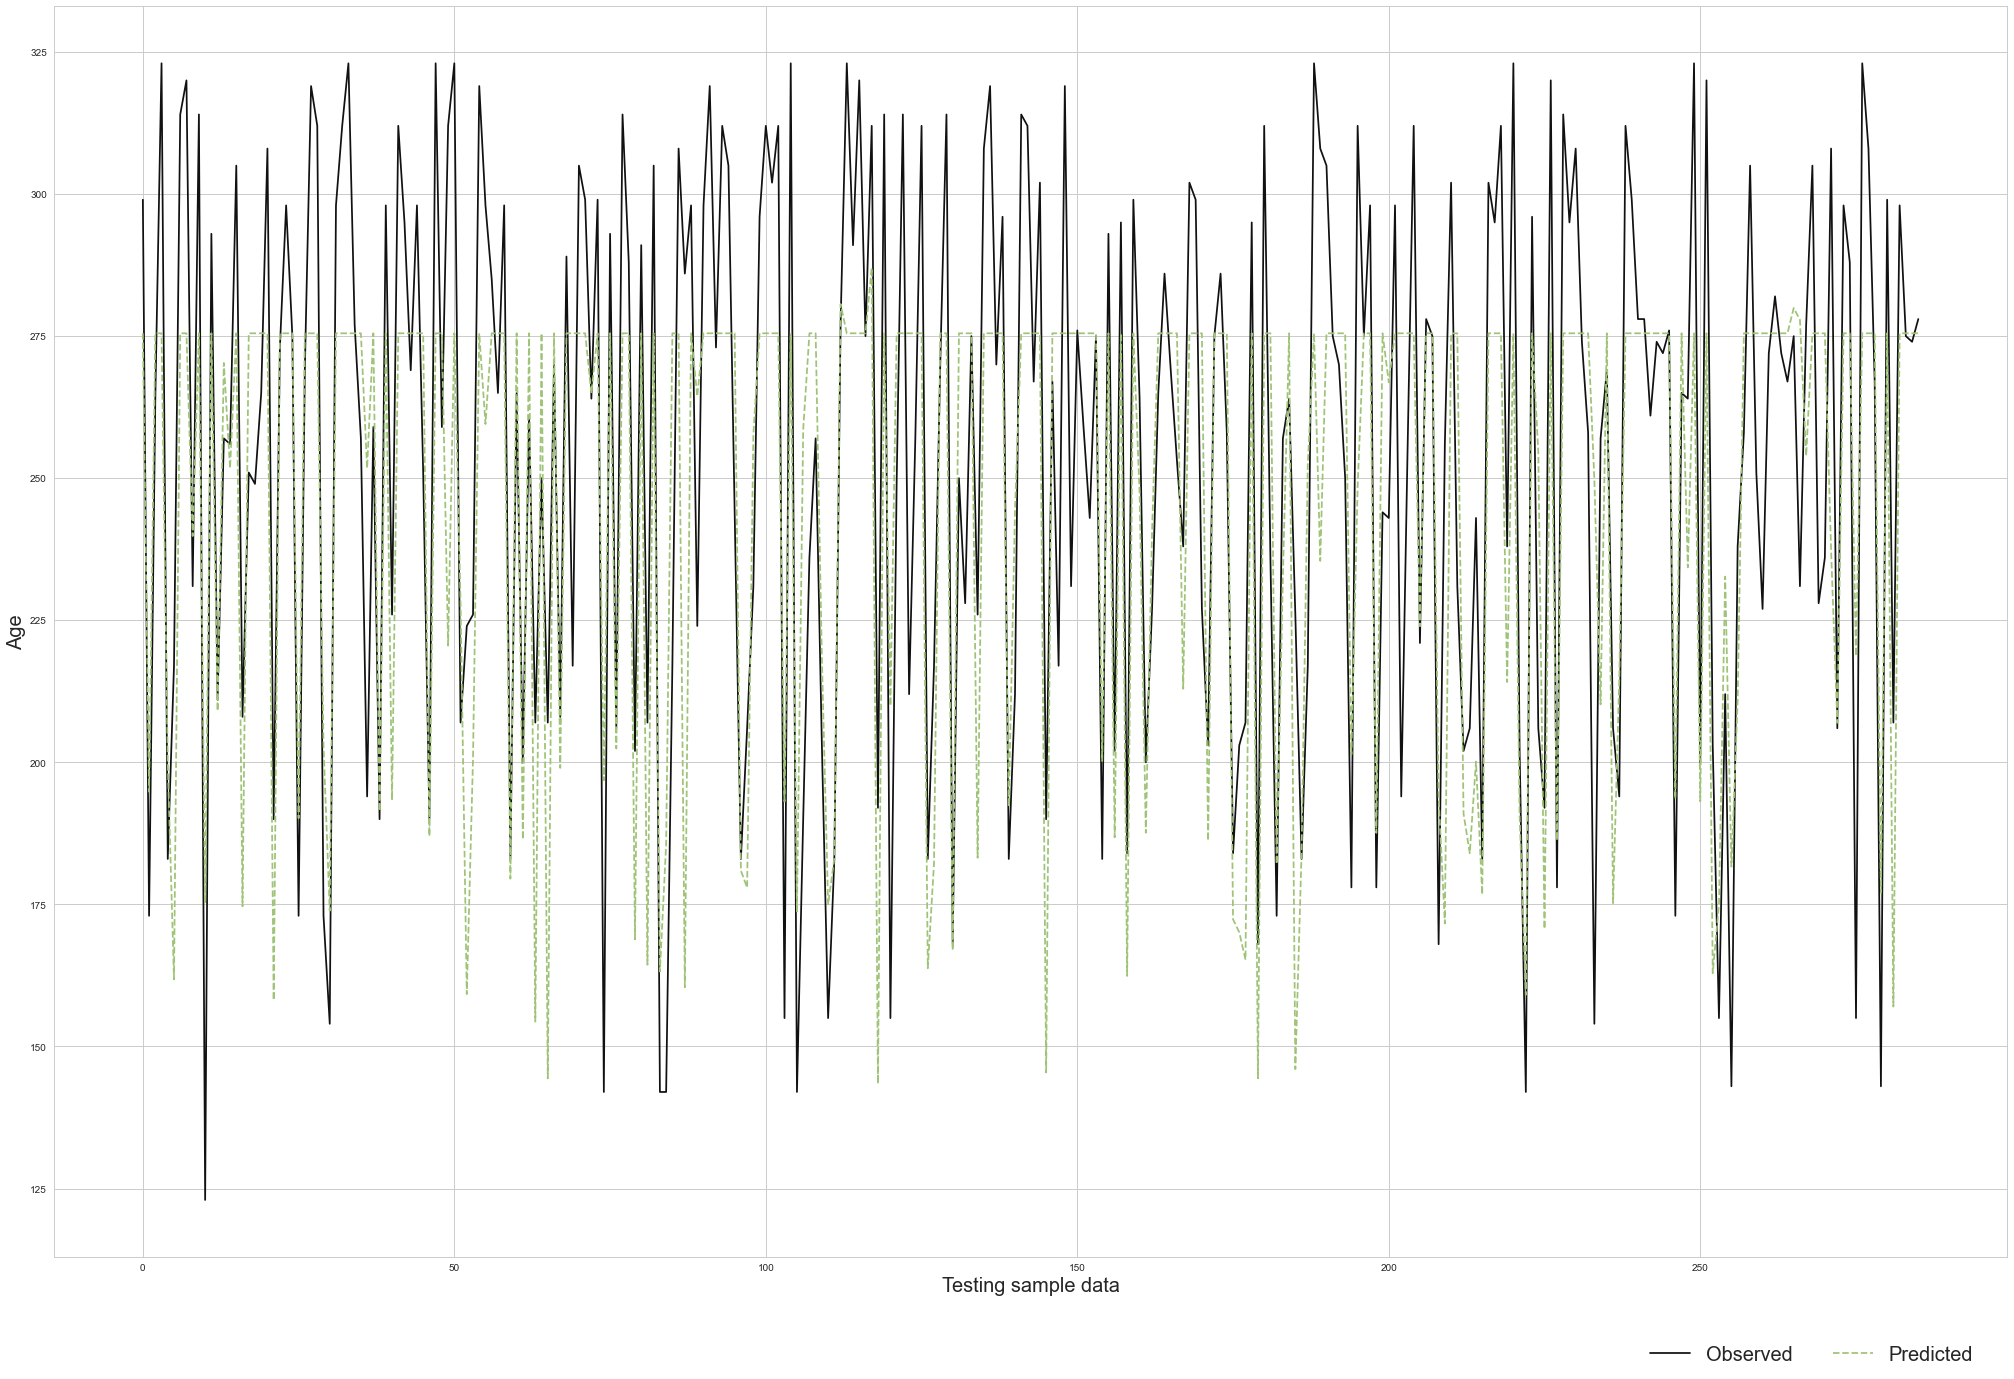

In [34]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (35,23)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, final_prediction, label = 'Predicted', color = 'g', linestyle = '--')
plt.ylabel('Age', fontsize = "20")
plt.xlabel('Testing sample data', fontsize = "20")
plt.legend(bbox_to_anchor = (0.9, -0.1), loc = 'lower center', fontsize = "20", ncol = 2, frameon = False)

In [27]:
# Plotting the prediction error and residuals using yellowbrick
# Anaconda/Cmd prompt and type: pip install yellowbrick!pip install yellowbrick"

In [28]:
!pip install yellowbrick

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


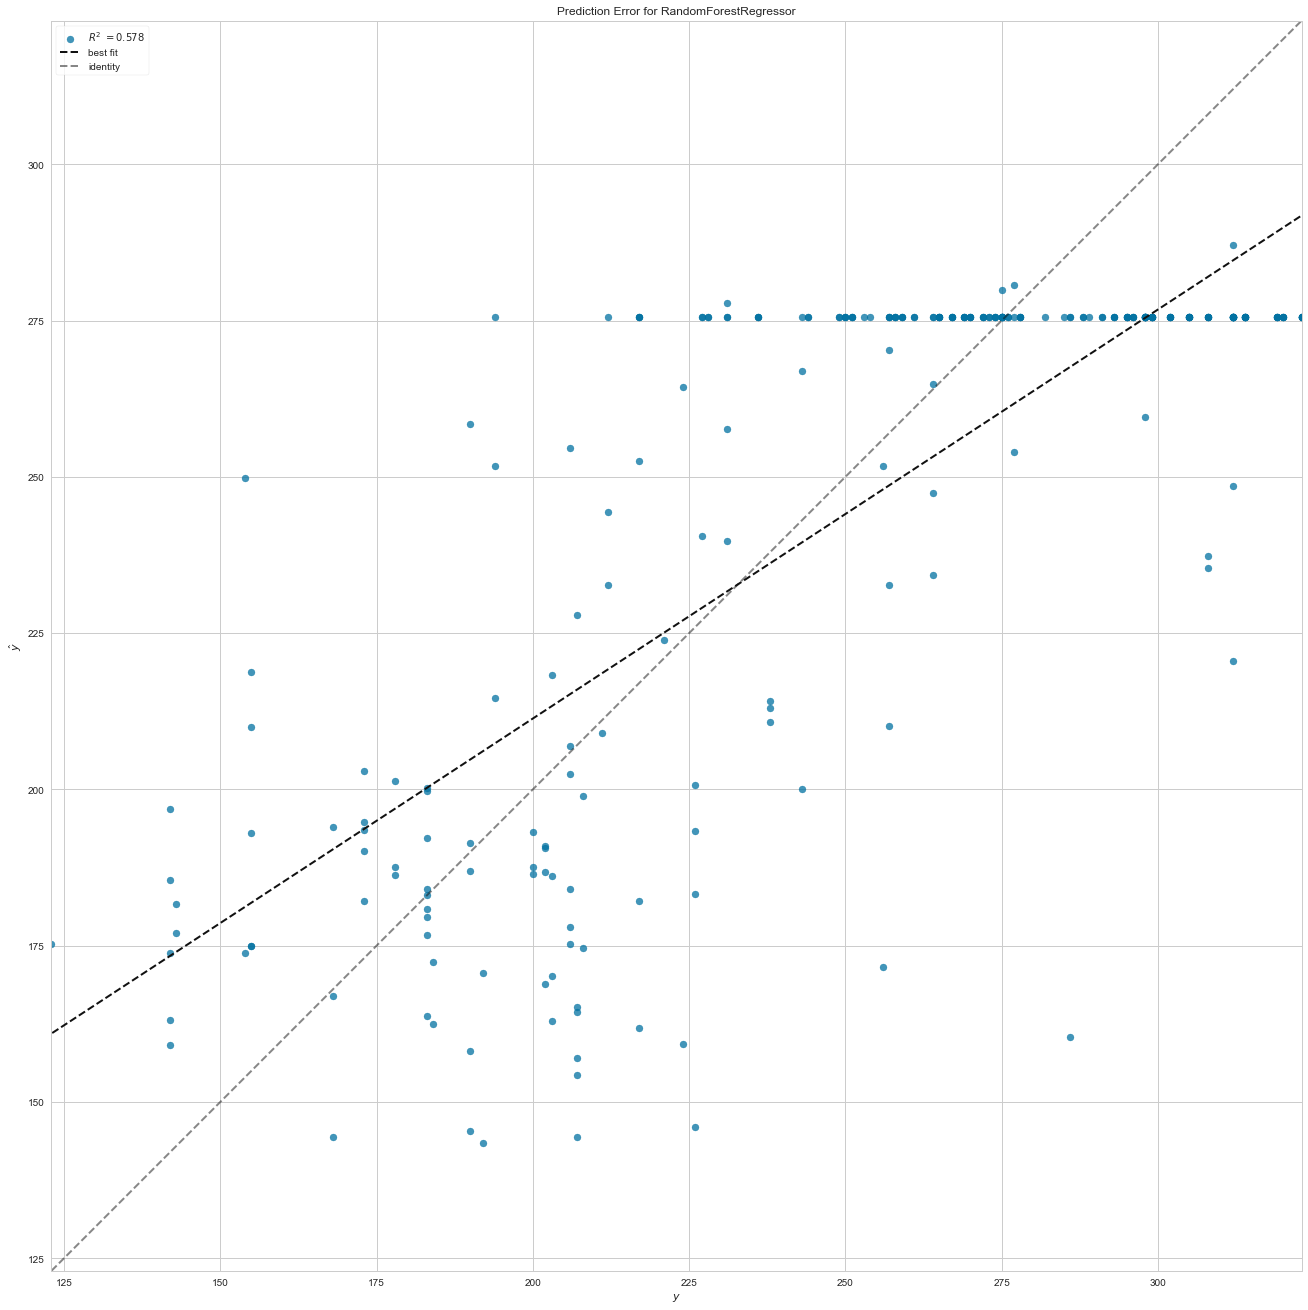

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


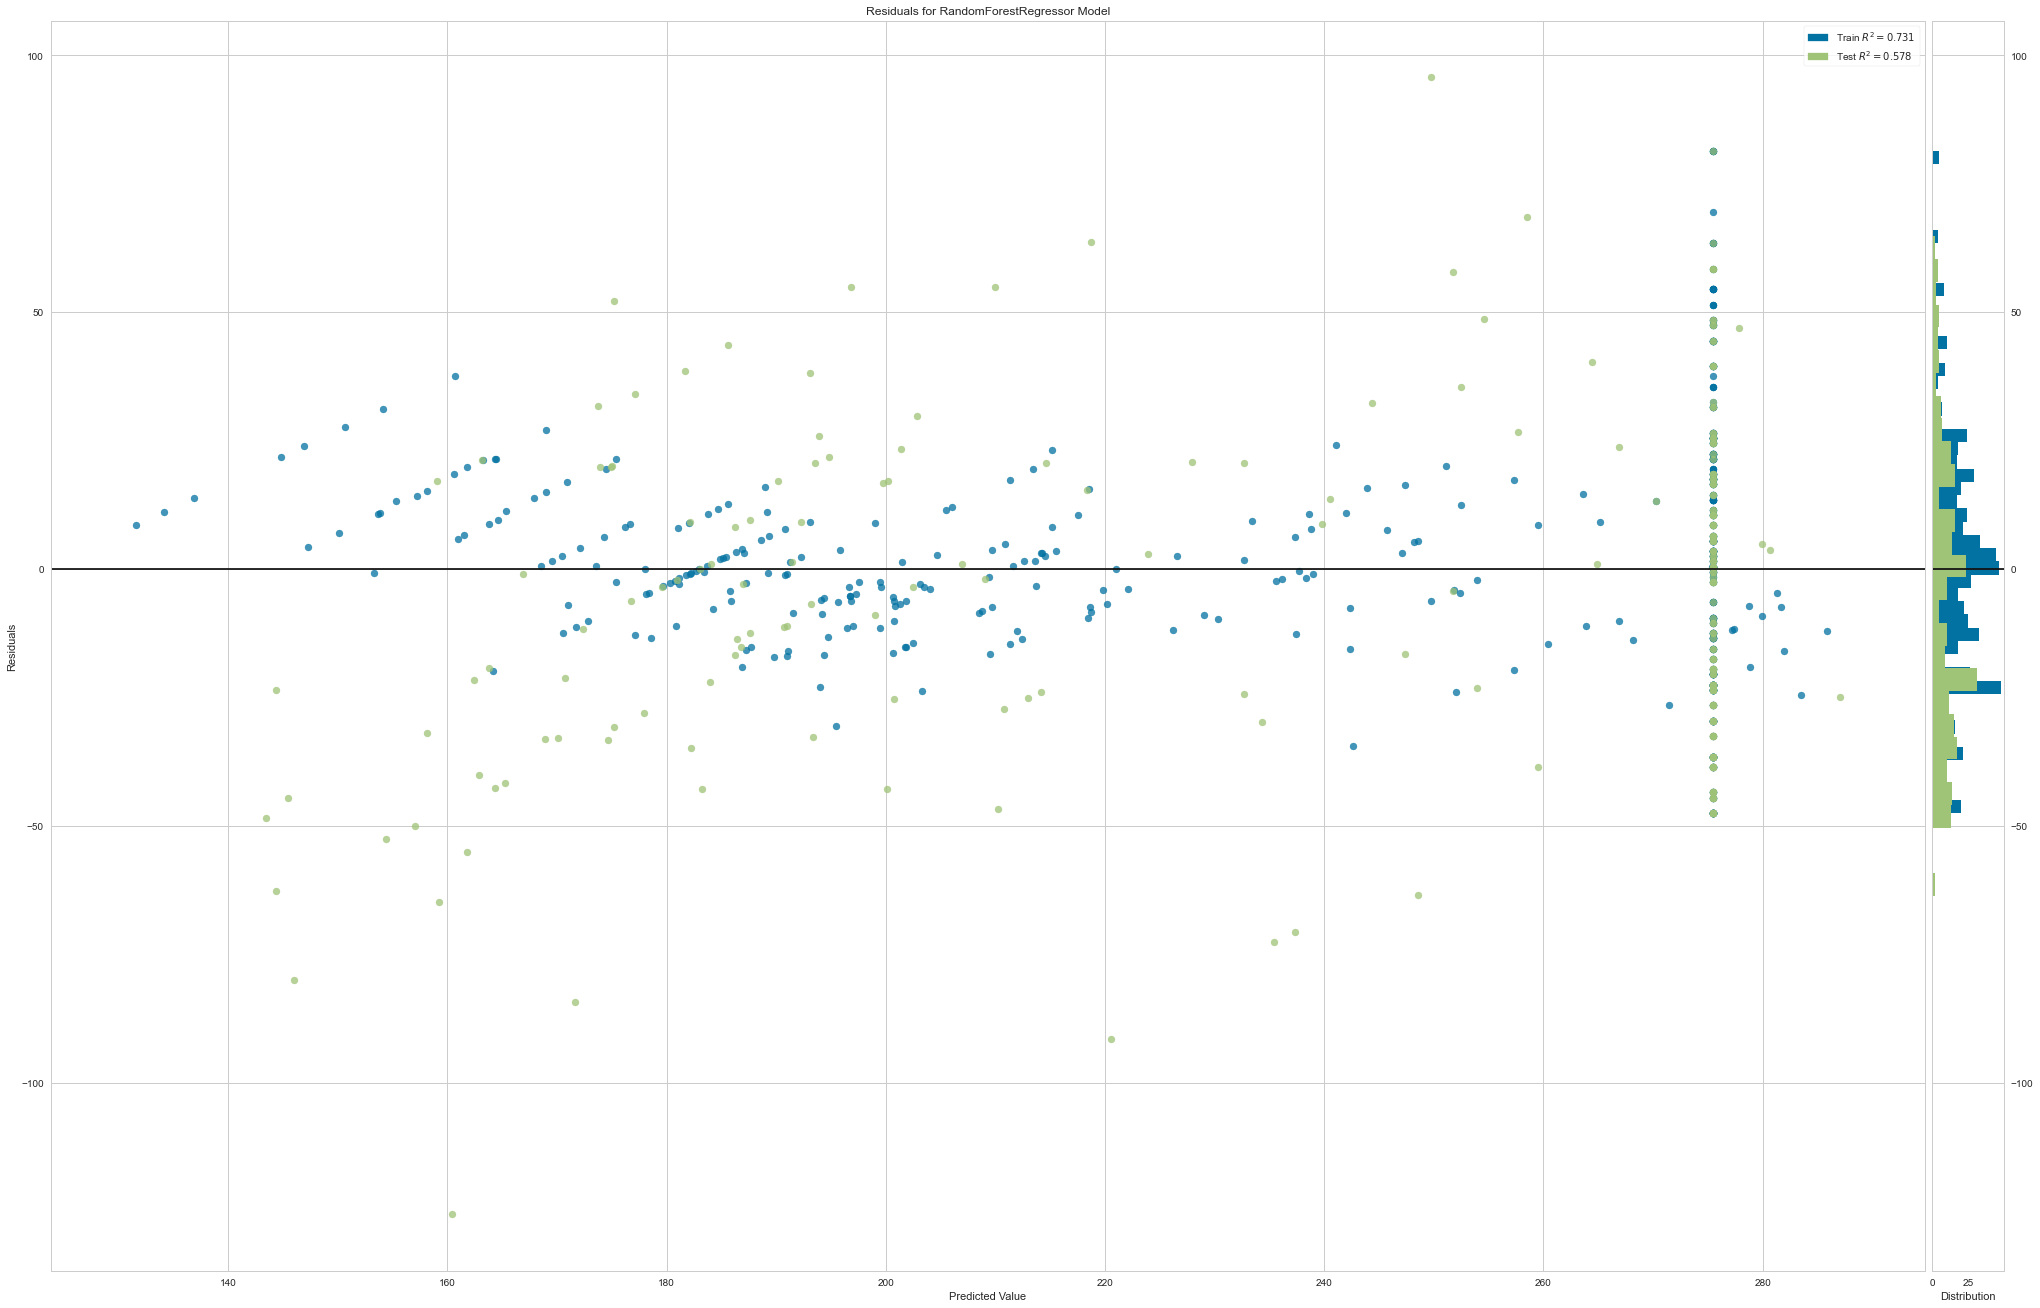

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance = pd.Series(final_model.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

R_area    0.915474
U_area    0.084526
dtype: float64


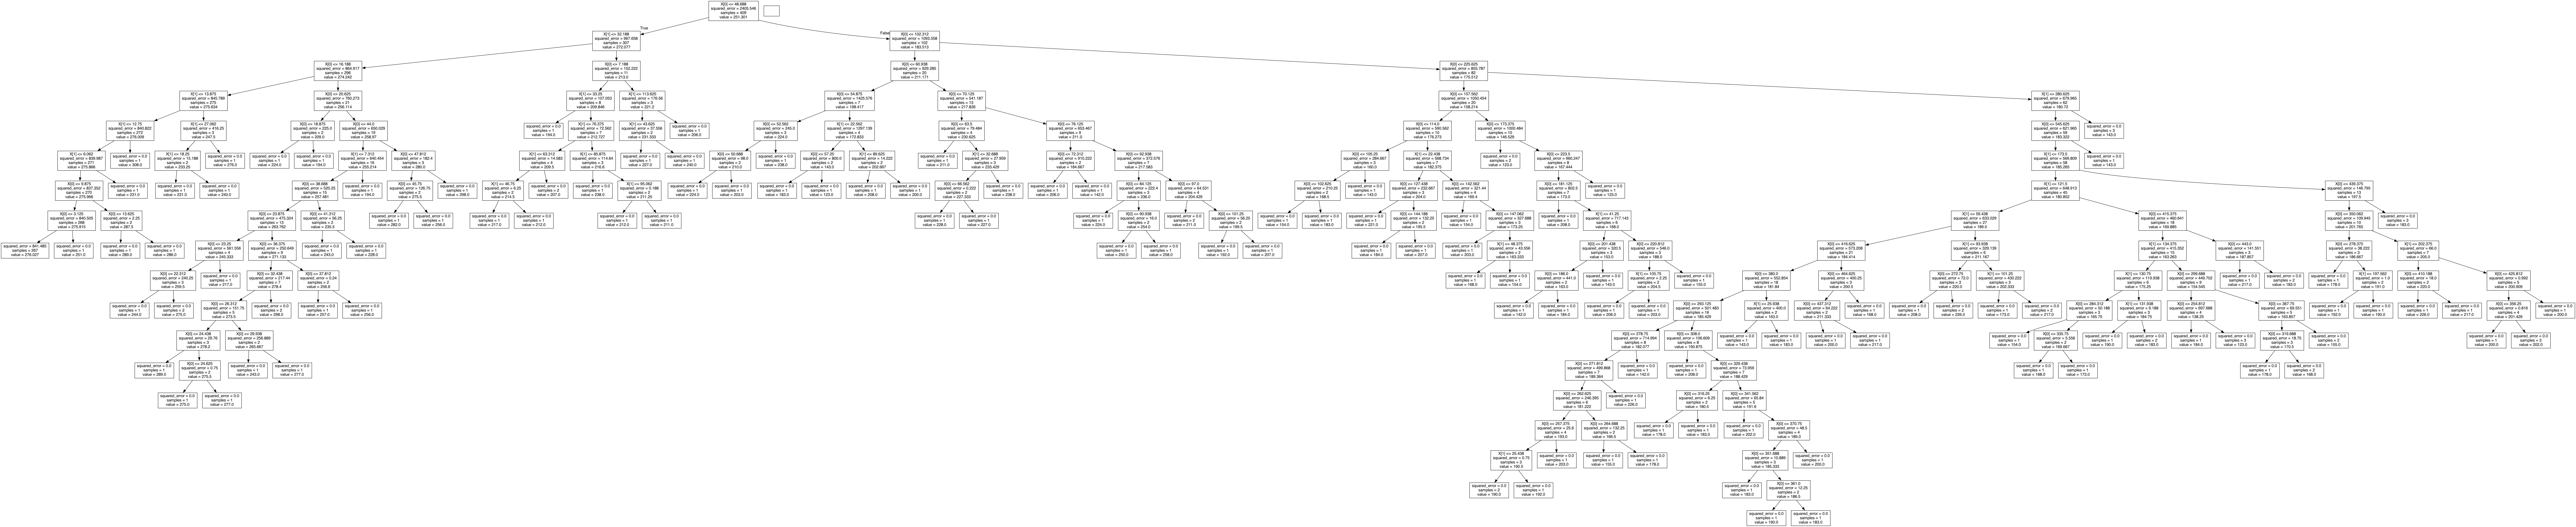

In [32]:
# Visualise the decision trees of the RFR
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
!pip install pydotplus
import pydotplus

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\lib\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

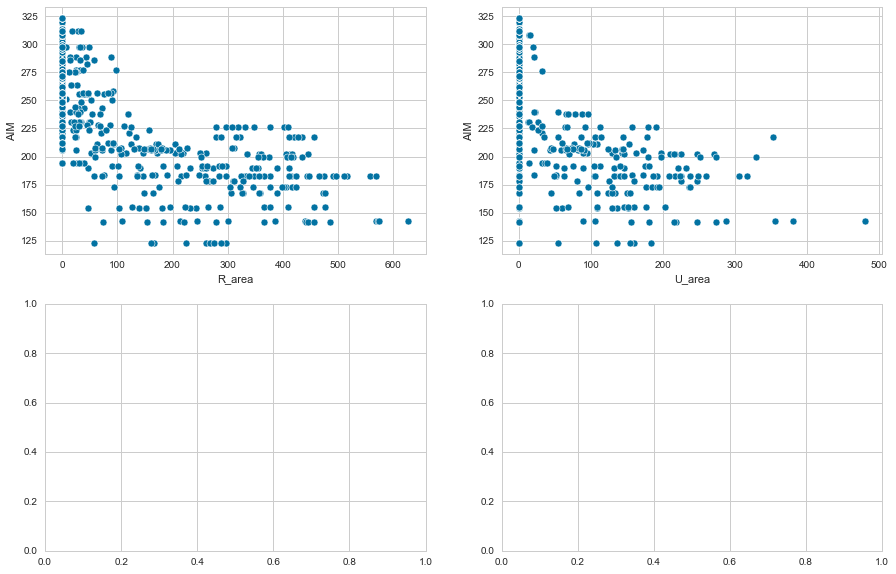

-0.718257685778057
-0.5631327345422366


In [33]:
# Pearson's correlation

# Pearson's correlation set up
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams 
import scipy 
from scipy.stats.stats import pearsonr

%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

mydata = pd.read_csv('MPD-area-radiusandulna-aim.csv')
mydata.columns = ['URN', 'R_area', 'U_area', 'AIM']
X = mydata.drop(['URN', 'AIM'], axis = 1)
y = mydata['AIM']
fig,axis = plt.subplots (2,2, figsize = (15,10))
sb.scatterplot (x = 'R_area', y = 'AIM', data = mydata, ax=axis[0,0])
sb.scatterplot (x = 'U_area', y = 'AIM', data = mydata, ax=axis[0,1])
#sb.scatterplot (x = 'Rep_area', y = 'Age_in_months', data = mydata, ax=axis[1,0])
#sb.scatterplot (x = 'Uep_area', y = 'Age_in_months', data = mydata, ax=axis[1,1])
plt.show()

corr1,_ = pearsonr(mydata['AIM'], mydata['R_area'])
corr2,_ = pearsonr(mydata['AIM'], mydata['U_area'])
print(corr1)
print(corr2)